In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Advertising.csv')

df = df.drop(columns=["Unnamed: 0"])

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

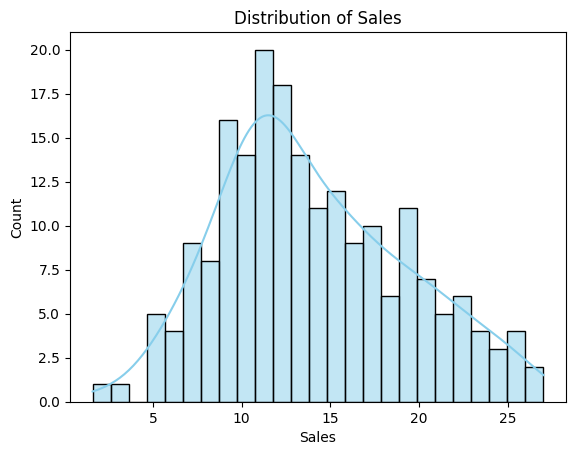

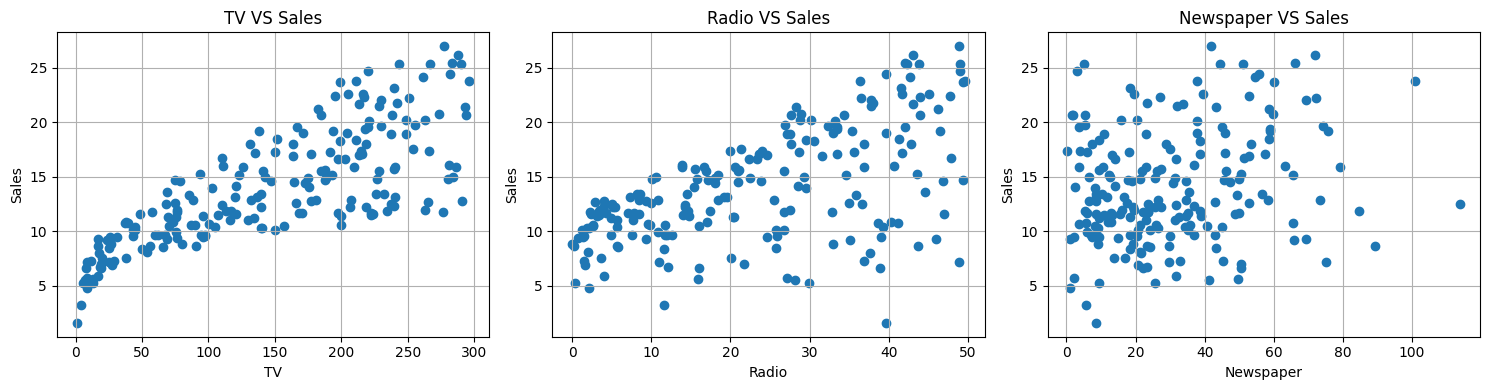

In [3]:
sns.histplot(df['Sales'], bins=25, kde=True, color='skyblue')
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.show()

features = ['TV', 'Radio', 'Newspaper']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, feat in enumerate(features):
    axes[i].scatter(df[feat], df['Sales'])
    axes[i].set_title(f"{feat} VS Sales")
    axes[i].set_xlabel(feat)
    axes[i].set_ylabel("Sales")
    axes[i].grid(True)

plt.tight_layout()
plt.show()


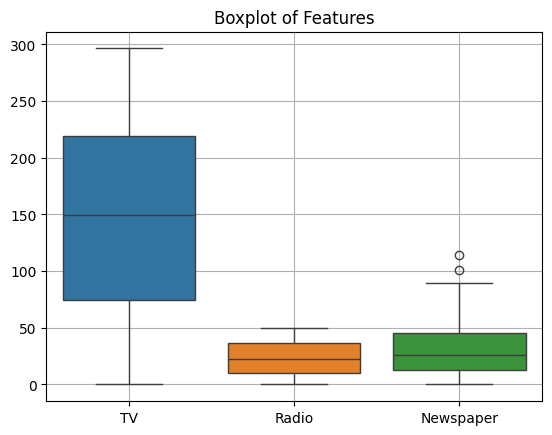

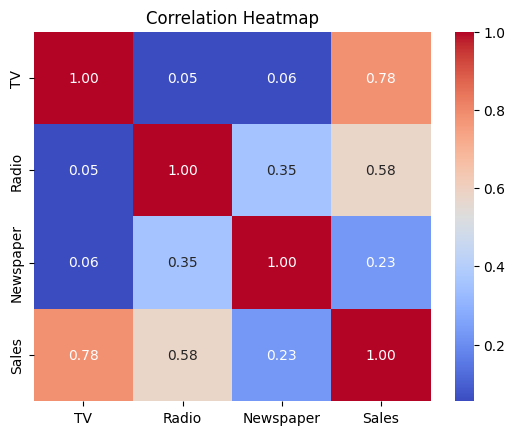

In [4]:
sns.boxplot(data=df[features])
plt.title("Boxplot of Features")
plt.grid(True)
plt.show()

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [5]:
X = df[features].values
y = df['Sales'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.20,
    random_state=42
)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [7]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"  {feat}: {coef:.4f}")

Intercept: 14.1
Coefficients:
  TV: 3.7642
  Radio: 2.7923
  Newspaper: 0.0560


In [13]:
y_pred = model.predict(x_test_scaled)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)

print(f"MAE: {MAE:.2f}")
print(f"RMSE: {RMSE:.2f}")
print(f"R2: {R2}")

MAE: 1.46
RMSE: 1.78
R2: 0.899438024100912


In [40]:
budgets = np.array([[200, 150, 100]])

budgets_scaled = scaler.transform(budgets)
predicted_sales = model.predict(budgets_scaled)

print("Total Contributions Of All Investments:", predicted_sales)

Total Contributions Of All Investments: [40.5803404]
